# Mini Project III

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed = 0

## Customer Clusters

In [260]:
df_cust = pd.read_csv('project_data/twm_customer.csv', sep=';')
df_cust

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [261]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [262]:
df_cust.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [263]:
df_cust.groupby(['city_name']).mean()

/var/folders/j9/6hghnr_j0f12zg3t1c862fg40000gp/T/ipykernel_79434/62137791.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
city_name,,,,,,,,
Albuquerque,1.362900e+06,20394.428571,37.571429,3.000000,0.571429,1.285714,7735.428571,87176.428571
Anaheim,1.363114e+06,18349.600000,39.400000,4.200000,1.200000,2.300000,5281.800000,92812.700000
Arlington,1.363082e+06,36464.000000,32.000000,2.000000,0.000000,1.000000,17068.000000,76017.000000
Atlanta,1.362748e+06,21161.500000,30.000000,4.500000,2.000000,3.000000,6529.500000,30332.000000
Austin,1.363095e+06,23248.181818,36.909091,3.545455,1.181818,1.909091,8128.636364,78741.454545
...,...,...,...,...,...,...,...,...
Tucson,1.363245e+06,21455.285714,45.857143,3.714286,0.285714,1.428571,8777.857143,85722.857143
Tulsa,1.363121e+06,15436.111111,49.444444,3.888889,1.000000,2.000000,6256.333333,74172.555556
Virginia Beach,1.363457e+06,86744.000000,57.000000,7.000000,0.000000,2.000000,10061.000000,23463.000000


In [264]:
X = df_cust.loc[:, ['income', 'age']]
X

,income,age
0,26150,46
1,6605,71
2,18548,38
3,47668,54
4,44554,59
...,...,...
742,14795,36
743,26387,56
744,61300,50
745,15100,37


Text(0, 0.5, 'Annual Income ($)')

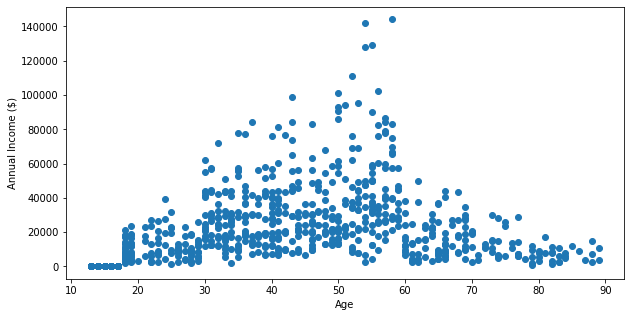

In [265]:
plt.figure(figsize=(10,5))
plt.scatter(x = X['age'], y = X['income'])
plt.xlabel('Age');
plt.ylabel('Annual Income ($)')

In [266]:
from sklearn.cluster import KMeans
km_cust = KMeans(n_clusters = 4)
km_cust.fit(X)

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

Text(0, 0.5, 'Annual Income ($)')

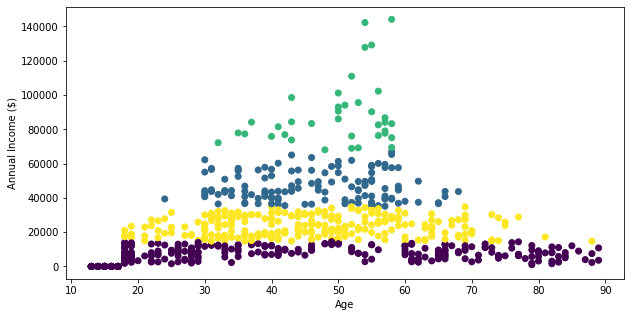

In [267]:
plt.figure(figsize=(10,5))
plt.scatter(x = X['age'], y = X['income'], c= km_cust.labels_)
plt.xlabel('Age');
plt.ylabel('Annual Income ($)')

In [270]:
wcss_cust = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    wcss_cust.append(km.inertia_)

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [271]:
wcss_cust

[133711301166.03732,
 66699107170.71622,
 37886249645.3024,
 27306996731.11535,
 17722482935.322475,
 12278331795.23426,
 8789430069.26381,
 6875073849.540687,
 5541894076.4907,
 4354115923.476124,
 3657324795.082026,
 3045229712.69467,
 2679413877.4383483]

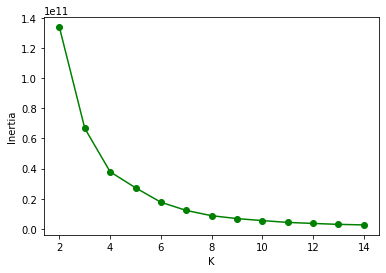

In [272]:
#changed wcss_acc to wcss_cust
plt.plot(range(2,15), wcss_cust, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");

In [273]:
from sklearn.metrics import silhouette_score

km_sil = KMeans(n_clusters = 4)
km_sil.fit(X)
silhouette_score(X, km_sil.labels_)

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.585661550662521

In [274]:
sil_scores = [] 
for i in range(2,15):
    km_sil = KMeans(n_clusters= i, random_state=seed)
    km_sil.fit(X)
    sil_scores.append(silhouette_score(X, km_sil.labels_))
sil_scores

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

[0.6464719000403939,
 0.6042861229392799,
 0.585661550662521,
 0.5864756405738184,
 0.5660260008786108,
 0.5702205564239334,
 0.5941917868126118,
 0.5957208658663982,
 0.5947202179068424,
 0.5963084003325155,
 0.5984199278960252,
 0.6006968491412875,
 0.5947806322044973]

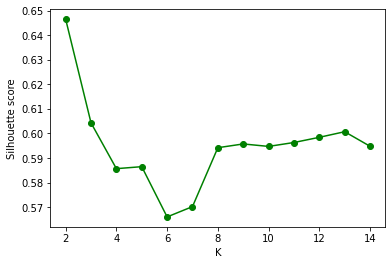

In [275]:
plt.plot(range(2,15), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [276]:
df_cust_clustered = df_cust.copy(deep=True)

df_cust_clustered['cluster'] = km_cust.labels_
df_cust_clustered

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,cluster
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,3
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,3
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,1
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,3
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,3
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,1
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,3


In [277]:
data_by_cluster = df_cust_clustered.groupby(['cluster'])

In [278]:
cluster_avgs = data_by_cluster.mean()
cluster_avgs

/var/folders/j9/6hghnr_j0f12zg3t1c862fg40000gp/T/ipykernel_79434/1316671189.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
cluster,,,,,,,,
0,1.362998e+06,5777.573574,37.783784,3.825826,0.288288,1.660661,8478.690691,59963.411411
1,1.362986e+06,46642.404762,46.396825,4.166667,1.380952,2.119048,8923.293651,54500.206349
2,1.362986e+06,88926.702703,49.864865,3.972973,0.837838,2.297297,8465.270270,57594.324324
3,1.362984e+06,23453.637450,45.653386,3.876494,0.928287,1.996016,8389.677291,61683.976096


In [279]:
#Min Max Scaling
df_min_max_scaled = cluster_avgs.copy()
  
column = 'income'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

column = 'age'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'years_with_bank'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'nbr_children'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

display(df_min_max_scaled)

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
cluster,,,,,,,,
0,1.362998e+06,0.000000,0.000000,0.000000,0.000000,1.660661,8478.690691,59963.411411
1,1.362986e+06,0.491464,0.712936,1.000000,1.000000,2.119048,8923.293651,54500.206349
2,1.362986e+06,1.000000,1.000000,0.431718,0.502945,2.297297,8465.270270,57594.324324
3,1.362984e+06,0.212583,0.651399,0.148656,0.585723,1.996016,8389.677291,61683.976096


In [ ]:
#Maximum Absolute Scaling

df_max_abs_scaled = cluster_avgs.copy()
  
column = 'income'
df_max_abs_scaled[column] = df_max_abs_scaled[column] / df_max_abs_scaled[column].abs().max()

column = 'age'
df_max_abs_scaled[column] = df_max_abs_scaled[column] / df_max_abs_scaled[column].abs().max()

column = 'years_with_bank'
df_max_abs_scaled[column] = df_max_abs_scaled[column] / df_max_abs_scaled[column].abs().max()

column = 'nbr_children'
df_max_abs_scaled[column] = df_max_abs_scaled[column] / df_max_abs_scaled[column].abs().max()

display(df_max_abs_scaled)

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
cluster,,,,,,,,
0,1.362998e+06,0.064970,0.757724,0.918198,0.208760,1.660661,8478.690691,59963.411411
1,1.362986e+06,1.000000,1.000000,0.953514,0.606710,2.297297,8465.270270,57594.324324
2,1.362986e+06,0.524504,0.930451,1.000000,1.000000,2.119048,8923.293651,54500.206349
3,1.362984e+06,0.263741,0.915542,0.930359,0.672208,1.996016,8389.677291,61683.976096


In [308]:
import plotly.graph_objects as go

df_s = df_min_max_scaled
#df_s = df_max_abs_scaled

categories = ['Income','Age','Years with Bank',
              'Number of Children']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[(df_s.loc[0, 'income']), (df_s.loc[0, 'age']), (df_s.loc[0, 'years_with_bank']), (df_s.loc[0, 'nbr_children'])],
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=[(df_s.loc[1, 'income']), (df_s.loc[1, 'age']), (df_s.loc[1, 'years_with_bank']), (df_s.loc[1, 'nbr_children'])],
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=[(df_s.loc[2, 'income']), (df_s.loc[2, 'age']), (df_s.loc[2, 'years_with_bank']), (df_s.loc[2, 'nbr_children'])],
      theta=categories,
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=[(df_s.loc[3, 'income']), (df_s.loc[3, 'age']), (df_s.loc[3, 'years_with_bank']), (df_s.loc[3, 'nbr_children'])],
      theta=categories,
      fill='toself',
      name='Cluster 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [280]:
df_cust['cluster'] = km_cust.labels_
df_cust

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,cluster
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,3
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,3
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,1
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,3
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,3
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,1
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,3


In [281]:
df_cust.groupby(['cluster']).mean().sort_values(['income'])

/var/folders/j9/6hghnr_j0f12zg3t1c862fg40000gp/T/ipykernel_79434/3448351996.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
cluster,,,,,,,,
0,1.362998e+06,5777.573574,37.783784,3.825826,0.288288,1.660661,8478.690691,59963.411411
3,1.362984e+06,23453.637450,45.653386,3.876494,0.928287,1.996016,8389.677291,61683.976096
1,1.362986e+06,46642.404762,46.396825,4.166667,1.380952,2.119048,8923.293651,54500.206349
2,1.362986e+06,88926.702703,49.864865,3.972973,0.837838,2.297297,8465.270270,57594.324324


In [282]:
df_cust[df_cust['cluster'] == 1].gender.value_counts(normalize=True)

F     0.5
M     0.5
Name: gender, dtype: float64

In [283]:
df_cust[df_cust['cluster'] == 3].gender.value_counts(normalize=True)

F     0.573705
M     0.426295
Name: gender, dtype: float64

In [284]:
df_cust[df_cust['cluster'] == 0].gender.value_counts(normalize=True)

F     0.603604
M     0.396396
Name: gender, dtype: float64

In [285]:
df_cust[df_cust['cluster'] == 2].gender.value_counts(normalize=True)

M     0.72973
F     0.27027
Name: gender, dtype: float64

In [286]:
df_cust[df_cust['cluster'] == 2].nbr_children.describe()

count    37.000000
mean      0.837838
std       1.014164
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       4.000000
Name: nbr_children, dtype: float64

In [287]:
## https://data.compass.lighthouselabs.ca/days/w05d5/activities/479

from sklearn.cluster import AgglomerativeClustering


cls_h = AgglomerativeClustering()
cls_h.fit(X)

AgglomerativeClustering()

# Bank Account Clusters

In [288]:
df_acc = pd.read_csv('project_data/twm_accounts.csv', sep=';')
df_acc

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [289]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [290]:
df_acc.describe()

,acct_nbr,cust_id,starting_balance,ending_balance
count,1.409000e+03,1.409000e+03,1409.00000,1409.000000
mean,1.514986e+15,1.362989e+06,1435.35357,1011.754336
std,2.148991e+15,2.940584e+02,2186.69662,1559.986310
min,1.362480e+07,1.362480e+06,0.00000,0.000000
25%,1.362852e+07,1.362727e+06,189.23000,140.000000
50%,1.363252e+07,1.362985e+06,487.69000,553.610000
75%,4.561143e+15,1.363251e+06,2178.79000,1188.570000
max,4.561143e+15,1.363495e+06,27072.38000,22432.780000


In [291]:
df_acc.groupby(['acct_type']).mean()

/var/folders/j9/6hghnr_j0f12zg3t1c862fg40000gp/T/ipykernel_79434/2839247191.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,acct_nbr,cust_id,starting_balance,ending_balance
acct_type,,,,
CC,4.561143e+15,1.362986e+06,1123.257521,1184.885662
CK,1.362993e+07,1.362992e+06,2170.671154,656.522692
SV,1.362988e+07,1.362987e+06,874.060950,1258.060736


In [292]:
conditions = [
    (df_acc['acct_type'].str[:2] == 'CC'),
    (df_acc['acct_type'].str[:2] == 'CK'),
    (df_acc['acct_type'].str[:2] == 'SV')]
choices = [0, 1, 2]

df_acc['acct_type_dummy'] = np.select(conditions, choices)

In [293]:
Y = df_acc.loc[:, ['acct_type_dummy', 'ending_balance']]
Y

,acct_type_dummy,ending_balance
0,2,284.58
1,0,496.15
2,0,1000.00
3,1,968.46
4,0,462.28
...,...,...
1404,0,20.00
1405,0,1400.00
1406,0,3000.00
1407,2,622.46


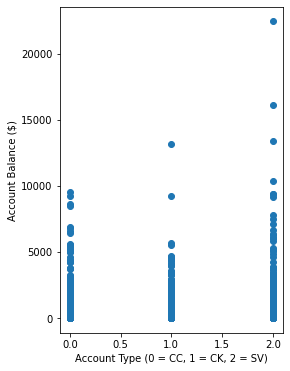

In [294]:
plt.figure(figsize=(4,6))
plt.scatter(x = Y['acct_type_dummy'], y=Y['ending_balance'])
plt.xlabel('Account Type (0 = CC, 1 = CK, 2 = SV)')
plt.ylabel('Account Balance ($)');

In [295]:
from sklearn.cluster import KMeans
km_acc = KMeans(n_clusters = 5)
km_acc.fit(Y)

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

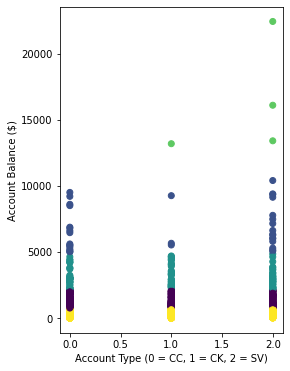

In [296]:
plt.figure(figsize=(4,6))
plt.scatter(x = Y['acct_type_dummy'], y=Y['ending_balance'], c= km_acc.labels_)
plt.xlabel('Account Type (0 = CC, 1 = CK, 2 = SV)')
plt.ylabel('Account Balance ($)');

In [297]:
wcss_acc = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(Y)
    wcss_acc.append(km.inertia_)

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

In [298]:
wcss_acc

[1482022185.7637446,
 810996509.8007218,
 492293292.35852444,
 306340461.18589085,
 204993125.8138592,
 148026726.4819103,
 101388149.90933637,
 77360316.97301376,
 56808278.41620624,
 47122457.44480006,
 39400627.87140607,
 31690214.554433465,
 27159070.53165506]

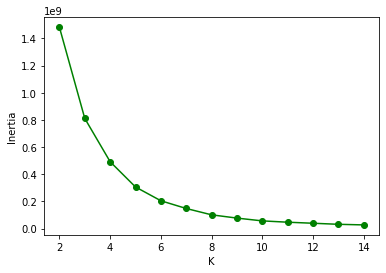

In [299]:
plt.plot(range(2,15), wcss_acc, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");

In [300]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 5)
km.fit(X)
silhouette_score(X, km.labels_)

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.5872995947633639

In [301]:
sil_scores = [] 
for i in range(2,15):
    km_sil = KMeans(n_clusters= i, random_state=seed)
    km_sil.fit(X)
    sil_scores.append(silhouette_score(X, km_sil.labels_))
sil_scores

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/johnnybravo/opt/anaconda3/envs/lhl_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

[0.6464719000403939,
 0.6042861229392799,
 0.585661550662521,
 0.5864756405738184,
 0.5660260008786108,
 0.5702205564239334,
 0.5941917868126118,
 0.5957208658663982,
 0.5947202179068424,
 0.5963084003325155,
 0.5984199278960252,
 0.6006968491412875,
 0.5947806322044973]

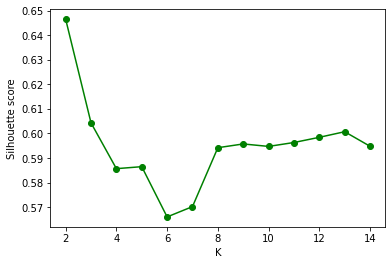

In [302]:
plt.plot(range(2,15), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [303]:
df_acc['cluster'] = km_acc.labels_
df_acc

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,acct_type_dummy,cluster
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,2,4
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0,4
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,0,0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,1,0
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,0,4
...,...,...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00,0,4
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00,0,0
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00,0,2
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46,2,4


In [304]:
df_acc.groupby(['cluster']).mean().sort_values(['ending_balance'])

/var/folders/j9/6hghnr_j0f12zg3t1c862fg40000gp/T/ipykernel_79434/124429284.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,acct_nbr,cust_id,starting_balance,ending_balance,acct_type_dummy
cluster,,,,,
4,1.064075e+15,1.362973e+06,1217.880050,234.865057,1.051702
0,2.220819e+15,1.363008e+06,1237.069017,1243.964585,0.810044
2,1.686473e+15,1.363026e+06,2390.603950,3076.170252,0.966387
1,2.085094e+15,1.362996e+06,4017.792857,6811.312000,1.000000
3,1.362734e+07,1.362733e+06,16238.017500,16279.477500,1.750000


In [305]:
df_acc[df_acc['cluster'] == 2].acct_type.value_counts(normalize=True)

CC      0.369748
SV      0.336134
CK      0.294118
Name: acct_type, dtype: float64

In [306]:
#https://data.compass.lighthouselabs.ca/days/w05d5/activities/479
from sklearn.cluster import AgglomerativeClustering


cls_h = AgglomerativeClustering()
cls_h.fit(X)

AgglomerativeClustering()

# Transaction & Account Data

In [307]:
df_acc_trans = pd.merge(df_acc, df_trans, how= "inner", on="acct_nbr")
df_acc_trans

NameError: name 'df_trans' is not defined

In [ ]:
df_acc_trans_avg = df_acc_trans.groupby(['acct_nbr']).mean()
df_acc_trans_avg

,cust_id,starting_balance,ending_balance,acct_type_dummy,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_time
acct_nbr,,,,,,,,,,
13624802,1362480.0,331.85,86.86,1.0,50.0,-2.474646,-2.474646,0.000000,291.679394,53309.050505
13624803,1362480.0,707.09,1187.97,2.0,13.5,18.550769,17.896154,0.654615,1166.453462,174072.576923
13624842,1362484.0,2613.46,95.32,1.0,50.0,-25.435758,-25.446667,0.010909,642.491414,90159.060606
13624843,1362484.0,194.76,2122.17,2.0,17.0,58.474545,57.953636,0.520909,994.759091,181776.818182
13624852,1362485.0,209.78,45.49,1.0,50.0,-1.659495,-1.659495,0.000000,359.301212,60259.727273
...,...,...,...,...,...,...,...,...,...,...
4561143213634830,1363483.0,946.26,1000.00,0.0,39.0,0.334805,-0.697922,1.033896,-655.056623,112301.337662
4561143213634840,1363484.0,867.01,408.08,0.0,20.0,12.080513,11.767436,0.313077,-185.114615,105913.256410
4561143213634850,1363485.0,4161.24,1000.00,0.0,12.0,139.239565,137.445217,1.794348,-298.260870,128213.000000


In [ ]:
Z = df_acc_trans.loc[:, ['acct_type_dummy', 'tran_amt']]
Z

,acct_type_dummy,tran_amt
0,2,0.00
1,2,72.82
2,2,-186.89
3,2,-80.00
4,2,0.00
...,...,...
77555,1,-206.75
77556,1,-10.00
77557,1,-159.53
77558,1,-197.79


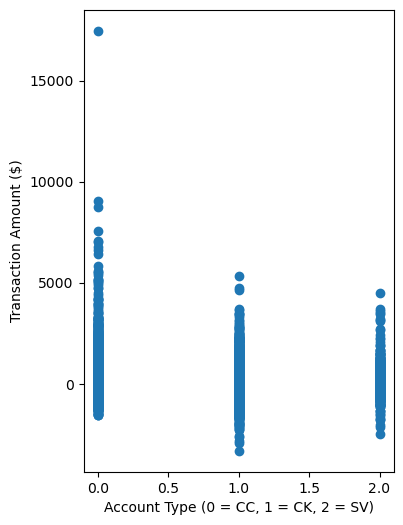

In [ ]:
plt.figure(figsize=(4,6))
plt.scatter(x = Z['acct_type_dummy'], y=Z['tran_amt'])
plt.xlabel('Account Type (0 = CC, 1 = CK, 2 = SV)')
plt.ylabel('Transaction Amount ($)');

In [ ]:
from sklearn.cluster import KMeans
km_acc_trans = KMeans(n_clusters = 3)
km_acc_trans.fit(Z)

KMeans(n_clusters=3)

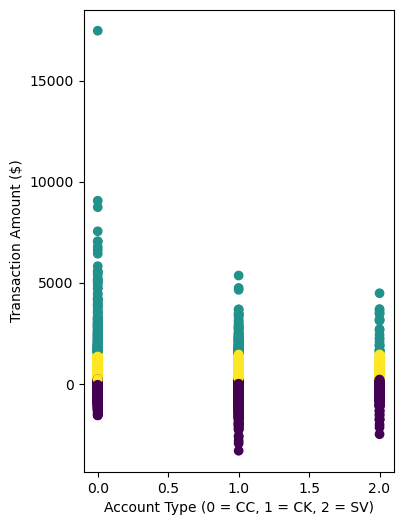

In [ ]:
plt.figure(figsize=(4,6))
plt.scatter(x = Z['acct_type_dummy'], y=Z['tran_amt'], c=km_acc_trans.labels_)
plt.xlabel('Account Type (0 = CC, 1 = CK, 2 = SV)')
plt.ylabel('Transaction Amount ($)');


In [ ]:
wcss_acc_trans = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(Z)
    wcss_acc_trans.append(km.inertia_)

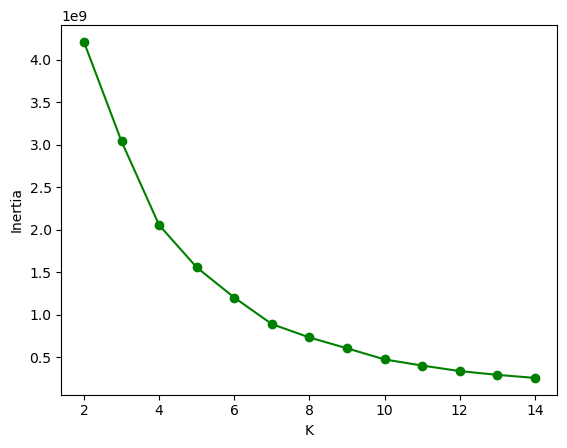

In [ ]:
plt.plot(range(2,15), wcss_acc_trans, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");

# Transactions Data

In [ ]:
df_trans = pd.read_csv('project_data/twm_transactions.csv', sep=';')
df_trans

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [ ]:
df1 = df_trans.groupby(['acct_nbr']).count()
df1 = df1.drop(['tran_amt','principal_amt', 'interest_amt', 'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'], axis = 1)
df1 = df1.rename(columns={'tran_id': 'transaction_count'})

In [ ]:
df2 = df_trans.groupby(['acct_nbr']).mean()
df2 = df2.drop(['tran_id','principal_amt','interest_amt','new_balance','tran_time'], axis = 1)
df2 = df2.rename(columns={'tran_amt': 'avg_tran_amt'})

In [ ]:
result = pd.concat([df1, df2], axis=1, join="inner")

#Remove outliers for big single transactions
result = result.drop(result[(result['avg_tran_amt'] > 1500)].index)
result

,transaction_count,avg_tran_amt
acct_nbr,,
13624802,99,-2.474646
13624803,26,18.550769
13624842,99,-25.435758
13624843,33,58.474545
13624852,99,-1.659495
...,...,...
4561143213634830,77,0.334805
4561143213634840,39,12.080513
4561143213634850,23,139.239565


In [ ]:
Q = result.loc[:, ['transaction_count', 'avg_tran_amt']]

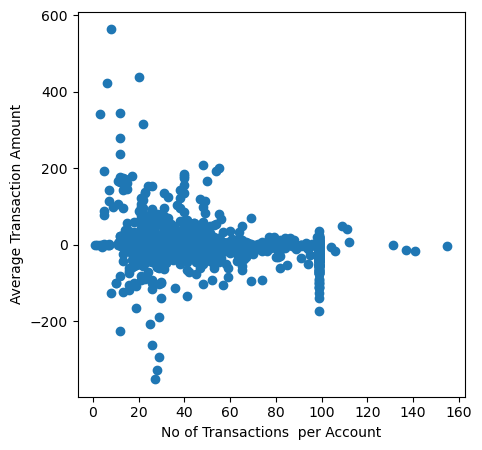

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x = Q['transaction_count'], y=Q['avg_tran_amt'])
plt.xlabel('No of Transactions  per Account')
plt.ylabel('Average Transaction Amount');

In [ ]:
from sklearn.cluster import KMeans
km_trans = KMeans(n_clusters = 5)
km_trans.fit(Q)

KMeans(n_clusters=5)

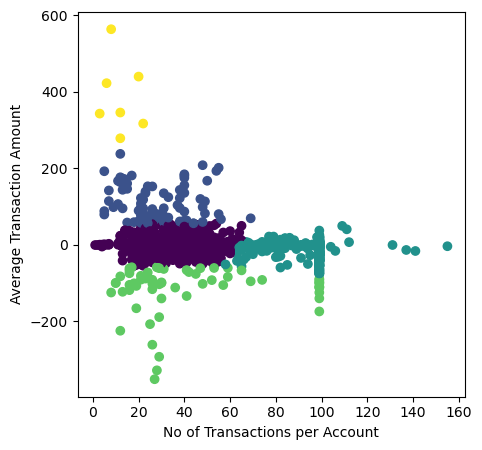

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x = Q['transaction_count'], y=Q['avg_tran_amt'], c=km_trans.labels_)
plt.xlabel('No of Transactions per Account')
plt.ylabel('Average Transaction Amount');

In [ ]:
wcss_trans = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(Q)
    wcss_trans.append(km.inertia_)

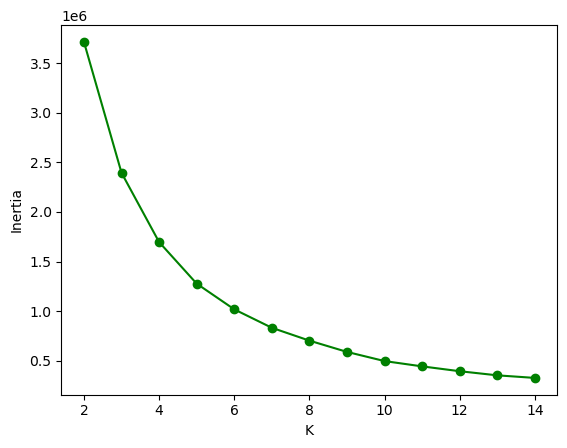

In [ ]:
plt.plot(range(2,15), wcss_trans, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");

In [ ]:
##scale avg_tran_amt, transaction_count, (avg)new_balance acct_type 1.0 and 2.0, (avg)new_balance acct_type 0.0, age

#import pandas
#from sklearn import linear_model
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()

#df = pandas.read_csv("data.csv")

#X = df[['avg_tran_amt', 'transaction_count', etc etc]]

#scaledX = scale.fit_transform(X)

#print(scaledX) 

In [ ]:
import nbformat
import plotly
import plotly.express as px
import plotly.graph_objects as go

categories = ['Average Transaction Amount','Number of Transactions','Average Balance',
              'Average CC Debt', 'Income']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[8, 5, 2, 1, 3],
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 9, 7, 2],
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=[2, 6, 4, 7, 5],
      theta=categories,
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=[9, 3, 4, 1, 5],
      theta=categories,
      fill='toself',
      name='Cluster 3'
))
fig.add_trace(go.Scatterpolar(
      r=[1, 3, 8, 3, 7],
      theta=categories,
      fill='toself',
      name='Cluster 4'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()
